<center><font size = "8">Neuronal morphologies: load, visualize and analyze<center>

<font size=5><font color=blue> In this notebook you will learn to differenciate two neurons by analysing some of their morphological characteristics

<p style="color: red; font-size: 16px;"><b>IMPORTANT:</b> this notebook is using <b>Python</b> code to help you load, visualize and analyze the morphologies.</p>
<ul style="color: red; font-size: 16px;">
  <li><b>YOU DON'T NEED TO KNOW HOW TO CODE!</b> (you will learn to code in future courses)</li>
  <li>YOU WOULD ONLY RUN THE CELLS. To run the cells: </li>
    <ul style="color: red; font-size: 16px;">
        <li>Click once on one of the cells, you will notice that it is sellected because it is highlighted in blue.</li>
        <li>Press "Command+enter" or click on the Run (triangle) button at the top of the page.</li>
        <li>Consider that cells <b>must be run by order</b> </li>
    </ul>
</ul>

<p style="color: green; font-size: 16px;"><b>YOUR GOAL:</b></p>
<ul style="color: green; font-size: 16px;">
  <li>to identify the differences between the neurons understanding and using the analyses and plots below</li>
</ul>

# Let's start!

In [1]:
# This cell loads the python packages necessary to run the following code

import neurom as nm
from neurom import features
from neurom import view
import neurom.features.morphology as morpho
from neurom.core.morphology import iter_neurites, iter_sections
from neurom.view.matplotlib_utils import (
    update_plot_limits,
)  # from NeuroM we import utils function to adjust the plot limits
import numpy as np
import matplotlib.pyplot as plt

import ipywidgets as widgets
from IPython.display import display, clear_output
import neurom.features as nf
import inspect

# 1. In the first part of this notebook we will focus on comparing two different neurons from layer 5 of the rat somatosensory cortex.

## 1.1 Load and visualize 

In [2]:
# Here are the paths to the morphology files that you can find in the "data" folder on the left
# Compatible file formats for morphology could be: ascii, swc, hdf5
path_to_file_01 = "data/ch150801A1.asc"
path_to_file_02 = "data/rp110202_L5-2_idA.asc"

# Define nicer names for the neurons
nrn_01 = path_to_file_01
nrn_02 = path_to_file_02

# Load neurons, so the code can use the neuron files
neuron_01 = nm.load_morphology(nrn_01)
neuron_02 = nm.load_morphology(nrn_02)

### Visualization

<p style="font-size: 16px;">
You will notice that the soma and the different neurites (basal dendrite, apical dendrite and axon) are plotted in different colors
</p>

* <p style="color: black">SOMA: black</p>
* <p style="color: red">BASAL DENDRITES: red</p>
* <p style="color: purple">APICAL DENDRITES: purple</p>
* <p style="color: blue">AXON: blue</p>

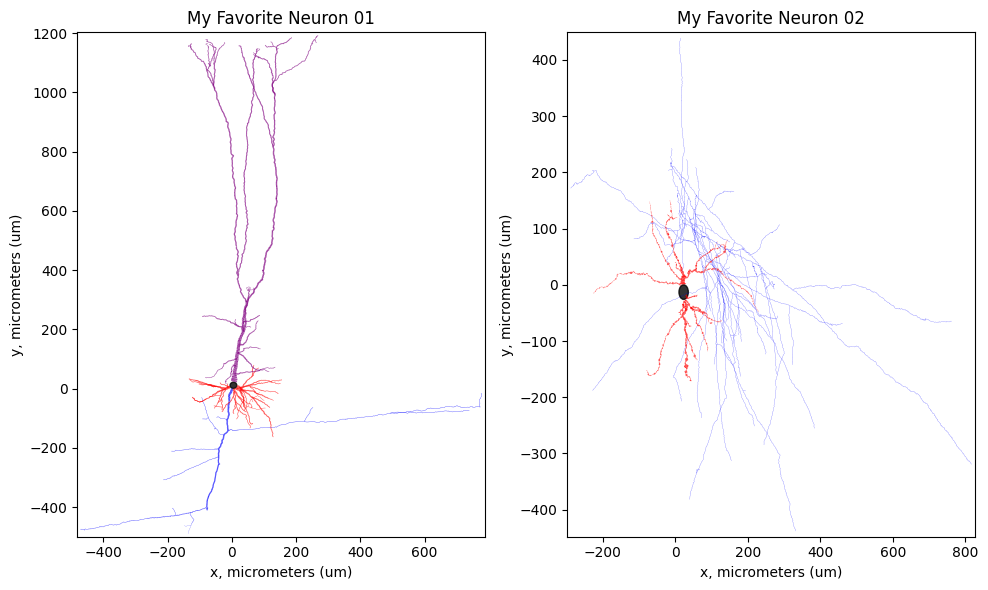

In [3]:
# Create a figure with 1 row and 2 columns of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# plot neuron_01
view.plot_morph(neuron_01, plane="xy", ax=ax1)
update_plot_limits(ax1, white_space=10)  # set your x, y plot limits to match with your neuron

# the axis handler is returend for further customization
ax1.set_title("My Favorite Neuron 01")
ax1.set_xlabel("x, micrometers (um)")
ax1.set_ylabel("y, micrometers (um)");


# plot neuron_02
view.plot_morph(neuron_02, plane="xy", ax=ax2)
update_plot_limits(ax2, white_space=10)  # set your x, y plot limits to match with your neuron

# the axis handler is returend for further customization
ax2.set_title("My Favorite Neuron 02")
ax2.set_xlabel("x, micrometers (um)")
ax2.set_ylabel("y, micrometers (um)");

plt.tight_layout()
plt.show()

### Visualizing the neurites

<p style="font-size: 16px;">
We can also plot the different neurites separately
</p>
<p style="font-size: 16px;">
<b>*Neurite:</b> general term for any projection from the cell body of a neuron (axon or dendrite).
</p>

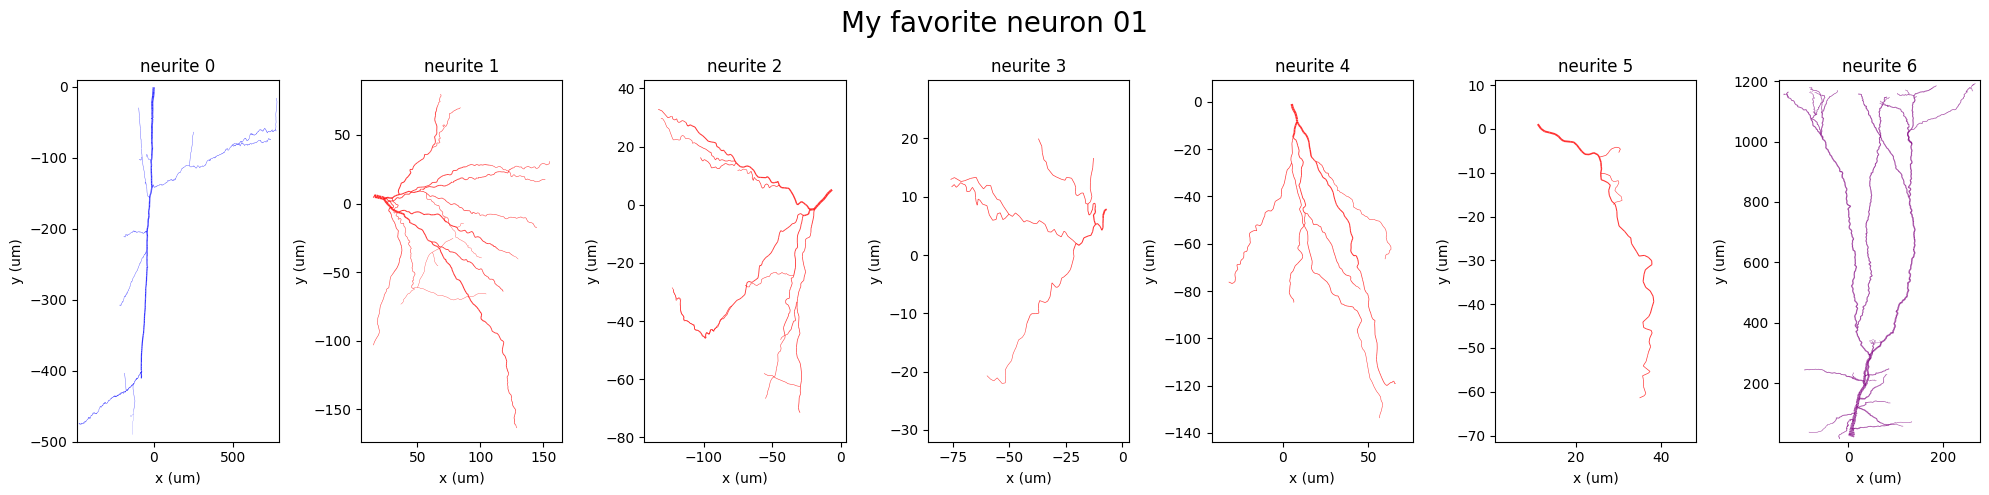

In [4]:
neurites_01 = neuron_01.neurites

# Plot each of the neurites separately for neuron_01
N = len(neurites_01)

# create N subplots, one for each neurite
fig, axes = plt.subplots(1, N, figsize=(20, 5))  # figsize in inches (width, height)

for i, neurite in enumerate(neurites_01):
    current_axes = axes[i]
    # draw the neurite in the i-th subplot
    # every time the function is called. The one that we created above will be used instead
    view.matplotlib_impl.plot_tree(neurite, ax=current_axes, plane="xy")
    update_plot_limits(current_axes, white_space=10)

    # remove the xy axes for a prettier result
    # current_axes.axis('off')

    # remove the title for each subplot
    current_axes.set_xlabel("x (um)")
    current_axes.set_ylabel("y (um)")
    current_axes.set_title(f"neurite {i}")
    plt.tight_layout()

# set a global title for the figure
fig.suptitle("My favorite neuron 01", fontsize=20);
plt.tight_layout()

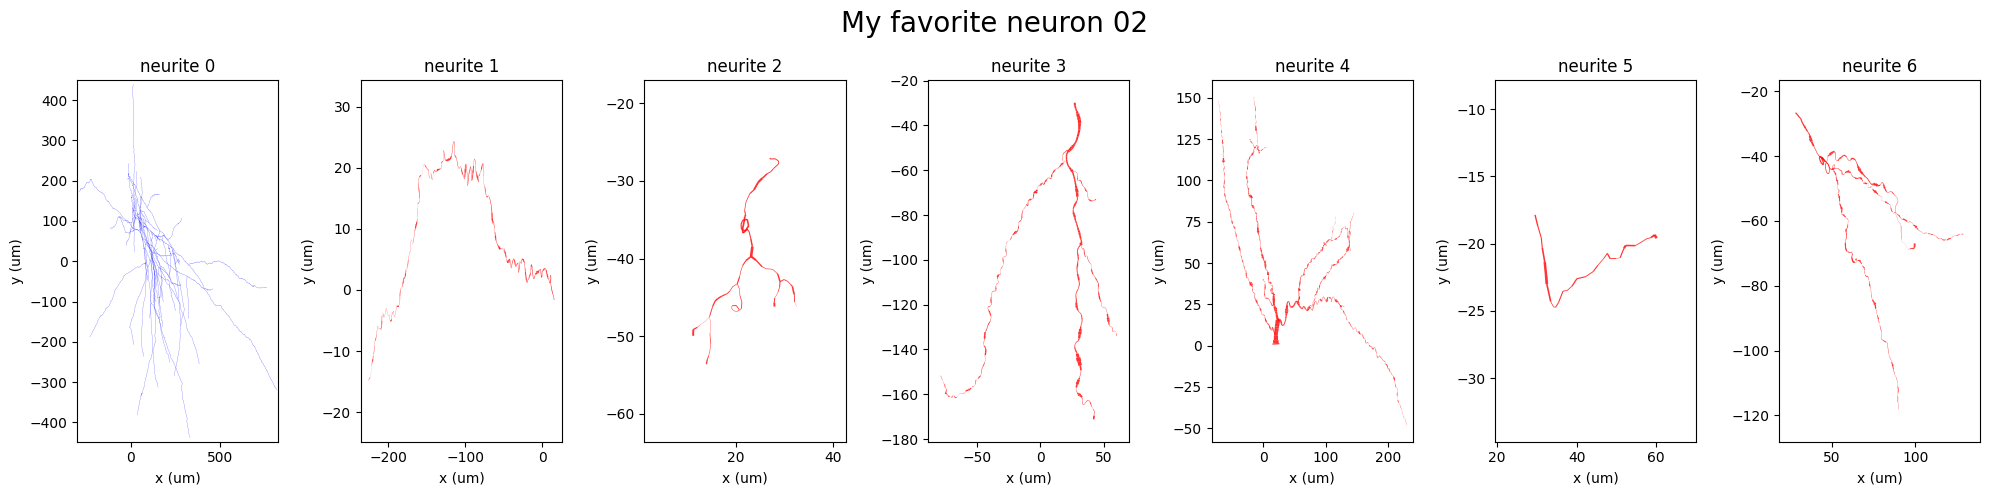

In [5]:
neurites_02 = neuron_02.neurites

# Plot each of the neurites separately for neuron_02
N = len(neurites_02)

# create N subplots, one for each neurite
fig, axes = plt.subplots(1, N, figsize=(20, 5))  # figsize in inches (width, height)

for i, neurite in enumerate(neurites_02):
    current_axes = axes[i]
    # draw the neurite in the i-th subplot
    # every time the function is called. The one that we created above will be used instead
    view.matplotlib_impl.plot_tree(neurite, ax=current_axes, plane="xy")
    update_plot_limits(current_axes, white_space=10)

    # remove the xy axes for a prettier result
    # current_axes.axis('off')

    # remove the title for each subplot
    current_axes.set_xlabel("x (um)")
    current_axes.set_ylabel("y (um)")
    current_axes.set_title(f"neurite {i}")
    plt.tight_layout()

# set a global title for the figure
fig.suptitle("My favorite neuron 02", fontsize=20);
plt.tight_layout()

### 1.2. Dendrogram:

<p style="font-size: 16px;">
A dendrogram is a hierarchical tree diagram that illustrates the structural relationships and complexity of a neuron's dendritic and axonal arbor. 
Reading a dendrogram of a neuron means looking at where branches split, how many times they split, and how long they are. It tells you about the complexity, symmetry, and reach of the neuron’s structure.
</p>

---

### How to Read It
    
1. **Root (the starting point)**  
   - Usually at the bottom (sometimes at the top).  
   - Represents the soma (cell body) or the point where tracing starts.  

2. **Branches (lines that split off)**  
   - Each split shows a **branching point** in the neuron.  
   - The more branches you see, the more complex the morphology.  

3. **Length of the branches (horizontal or vertical distance, depending on orientation)**  
   - Represents the **physical length** of that branch segment in the neuron.  
   - Longer lines = longer dendritic or axonal segment.  

4. **Endpoints (leaves of the tree)**  
   - These are the **tips of the dendrites or axon terminals**.  
---

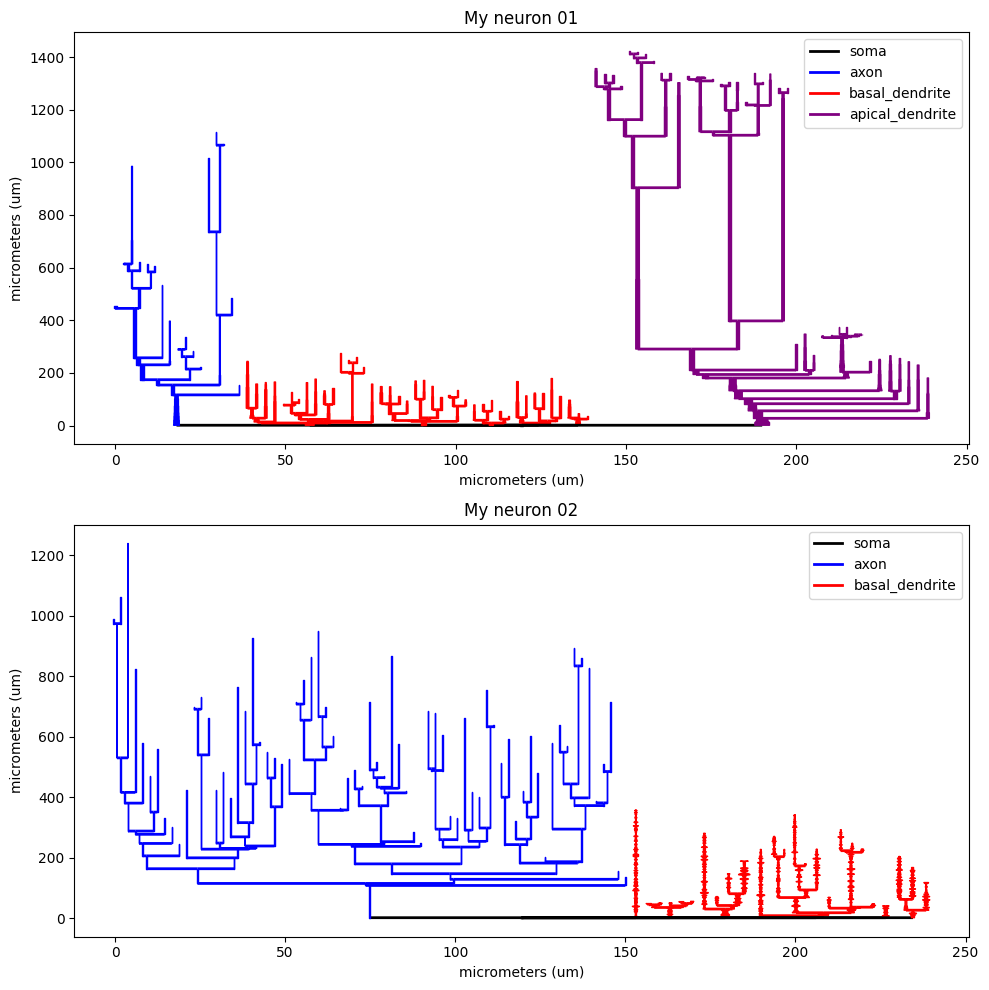

In [6]:
# DENDROGRAM of both neurons

# Create a figure with 2 raws and 1 columns of subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# plot dendogram of neuron_01
view.plot_dendrogram(neuron_01, ax=ax1)
ax1.set_title("My neuron 01")

# plot dendogram of neuron_02
view.plot_dendrogram(neuron_02, ax=ax2)
ax2.set_title("My neuron 02")
                     
plt.tight_layout()
plt.show()

### 1.3. Morphometrics: analysis
<p style="font-size: 16px;">
The quantitative analysis of the shape, size, and branching structure of neurons. 
</p>
<p style="font-size: 16px;">
It involves measuring features such as dendrite length, number of branches, branching angles and soma size, among others, to compare and classify neurons.
</p>

#### Soma radius

In [7]:
soma_radius_01 = nm.get("soma_radius", neuron_01)
soma_radius_02 = nm.get("soma_radius", neuron_02)

print('soma radious neuron_01:', soma_radius_01, 'µm')
print('soma radious neuron_02:', soma_radius_02, 'µm')

soma radious neuron_01: 10.497238159179688 µm
soma radious neuron_02: 12.922274589538574 µm


#### Neurite volume density

In [8]:
Neurite_vol_dens_01 = nm.get("neurite_volume_density", neuron_01)
Neurite_vol_dens_02 = nm.get("neurite_volume_density", neuron_02)

print('mean neurite volume density neuron_01:', np.mean(Neurite_vol_dens_01), 'neurite/mm3')
print('mean neurite volume density neuron_02:', np.mean(Neurite_vol_dens_02), 'neurite/mm3')

mean neurite volume density neuron_01: 0.003426278424873134 neurite/mm3
mean neurite volume density neuron_02: 0.03312870794414728 neurite/mm3


#### Maximum radial distance

In [9]:
Max_rad_dist_01 = nm.get("max_radial_distance", neuron_01)
Max_rad_dist_02 = nm.get("max_radial_distance", neuron_02)

print('maximum radial distance neuron_01:', Max_rad_dist_01, 'µm')
print('maximum radial distance neuron_02:', Max_rad_dist_02, 'µm')

maximum radial distance neuron_01: 1210.74609375 µm
maximum radial distance neuron_02: 850.7958984375 µm


#### Total height

In [10]:
Total_h_01 = nm.get("total_height", neuron_01)
Total_h_02 = nm.get("total_height", neuron_02)

print('total height neuron_01:', Total_h_01, 'µm')
print('total height neuron_02:', Total_h_02, 'µm')

total height neuron_01: 1682.739990234375 µm
total height neuron_02: 877.1500244140625 µm


#### PLot the results

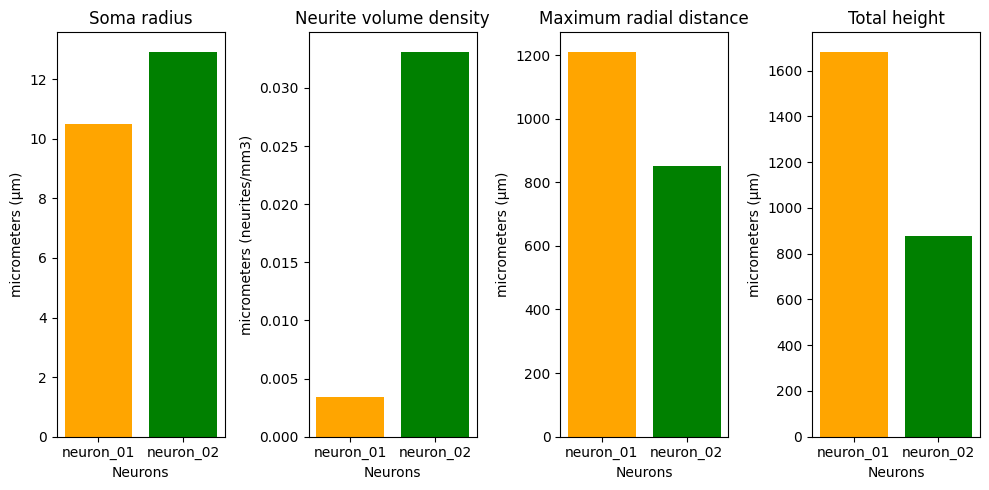

In [11]:
# Create a figure with 1 row and 4 columns of subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10, 5))

neurons = ['neuron_01', 'neuron_02']
colors = ['orange', 'green']

# soma radius
soma_radius = [soma_radius_01, soma_radius_02]
ax1.bar(neurons, soma_radius, color=colors)

ax1.set_title("Soma radius")
ax1.set_xlabel("Neurons")
ax1.set_ylabel("micrometers (µm)");


# Neurite volume density
neurite_vol_dens = [np.mean(Neurite_vol_dens_01), np.mean(Neurite_vol_dens_02)]
ax2.bar(neurons, neurite_vol_dens, color=colors)

ax2.set_title("Neurite volume density")
ax2.set_xlabel("Neurons")
ax2.set_ylabel("micrometers (neurites/mm3)");

# Maximum radial distance
max_rad_dist = [Max_rad_dist_01, Max_rad_dist_02]
ax3.bar(neurons, max_rad_dist, color=colors)

ax3.set_title("Maximum radial distance")
ax3.set_xlabel("Neurons")
ax3.set_ylabel("micrometers (µm)");

# Total height
total_h = [Total_h_01,Total_h_02]
ax4.bar(neurons, total_h, color=colors)

ax4.set_title("Total height")
ax4.set_xlabel("Neurons")
ax4.set_ylabel("micrometers (µm)");

plt.tight_layout()
plt.show()

# 2. Now you will compare a human pyramidal neuron from layer 5 of temporal cortex against the pyramidal neuron from the rat we analysed before.

In [12]:
# Firts we load the neuron:

path_to_file_03 = "data/1935_H21.29.205.11.01.01.asc" 

# Define nicer name for the neuron
nrn_03 = path_to_file_03

# Load neuron, so the code can use the neuron files
neuron_03 = nm.load_morphology(nrn_03)

### Visualization

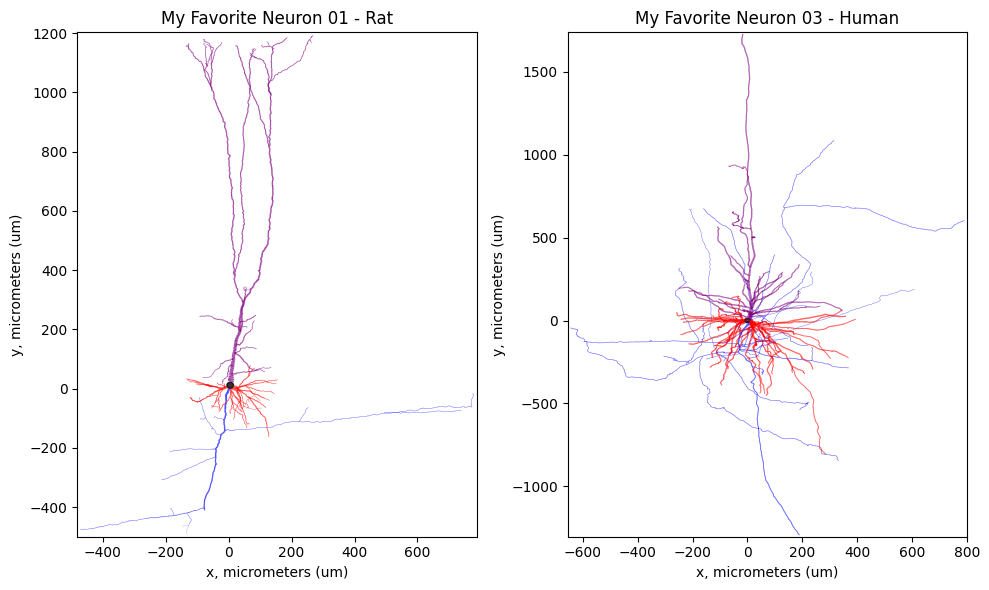

In [13]:
# Create a figure with 1 row and 2 columns of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# plot neuron_02 (rat)
view.plot_morph(neuron_01, plane="xy", ax=ax1)
update_plot_limits(ax1, white_space=10)  # set your x, y plot limits to match with your neuron

# the axis handler is returend for further customization
ax1.set_title("My Favorite Neuron 01 - Rat")
ax1.set_xlabel("x, micrometers (um)")
ax1.set_ylabel("y, micrometers (um)");


# plot neuron_03 (human)
view.plot_morph(neuron_03, plane="xy", ax=ax2)
update_plot_limits(ax2, white_space=10)  # set your x, y plot limits to match with your neuron

# the axis handler is returend for further customization
ax2.set_title("My Favorite Neuron 03 - Human")
ax2.set_xlabel("x, micrometers (um)")
ax2.set_ylabel("y, micrometers (um)");

plt.tight_layout()
plt.show()

### Dendrogram

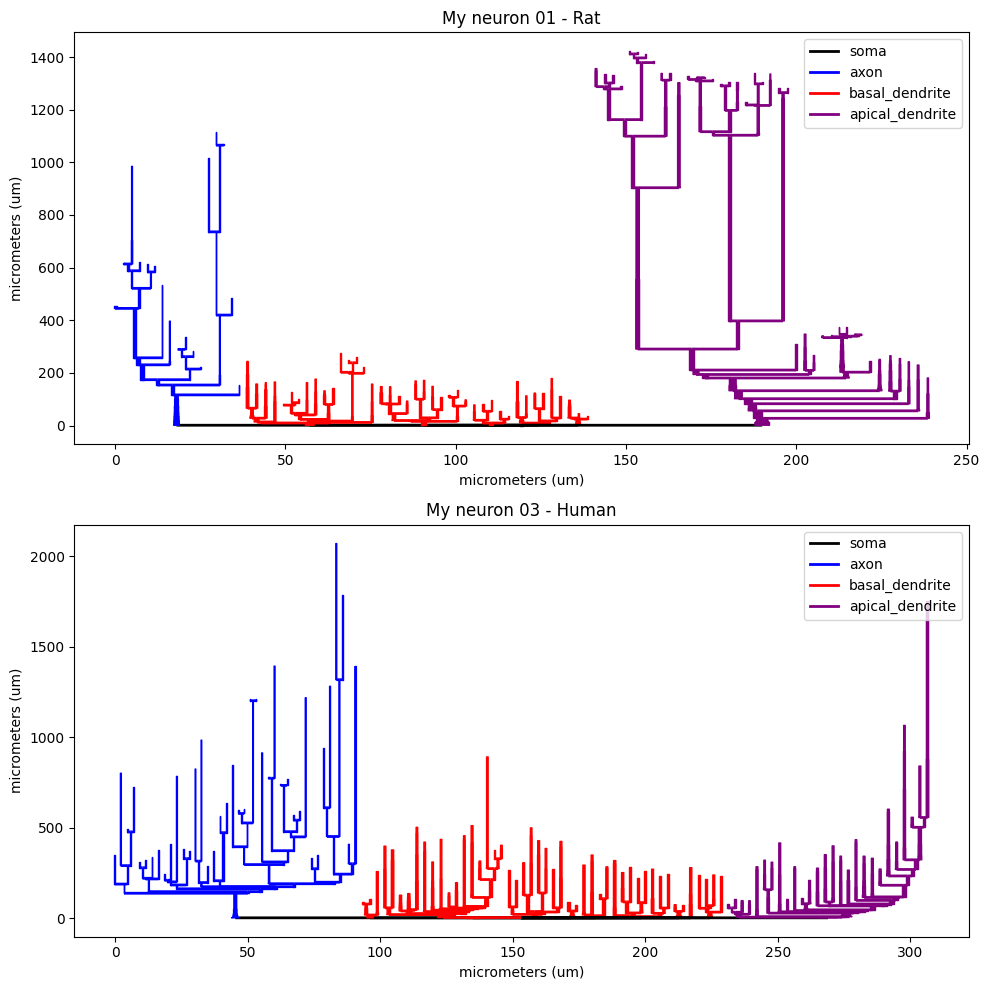

In [14]:
# DENDROGRAM of both neurons

# Create a figure with 2 raws and 1 columns of subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# plot dendogram of neuron_01
view.plot_dendrogram(neuron_01, ax=ax1)
ax1.set_title("My neuron 01 - Rat")

# plot dendogram of neuron_03
view.plot_dendrogram(neuron_03, ax=ax2)
ax2.set_title("My neuron 03 - Human")
                     
plt.tight_layout()
plt.show()

## Morphometrics

<p style="font-size: 16px;">
Comparing morphometrics across species needs to be thought carefully as we want to compare the biology and not just the size differences.
</p>
<p style="font-size: 16px;">
Normalizing the data sets is a good strategy to ensure accurate comparison.
</p>

---

### Normalization
    
1. **Decide what you want to compare**  
   - Relative shape or branching pattern. No dimensions involved. You should normalize away size.  
   - Absolute scale, so actual lengths and distances. Dimensions are involved. You should keep absolute values and model the size as a covariance of values. 

2. **Few common normalization strategies**
   - A. **Normalize by soma size: soma diameter or area**
       - When expect soma size to scale with dendrite size and we want neurite measurements relative to cell body.
   - B. **Normalize by neuron total length (per-neuron)**
       - When comparing per-neurite lengths relative to each neuron's total arbor.

---
<p style="font-size: 16px;">
<b>*Notice:</b> here we have a special case in which we are comparing one neuron from each specie. This is not the case in real life. Normally in scientific studies there should be multiple neurons for each specie, and for that there are many other types of normalization as well. </p>

### Height and Width not normalized vs normalized

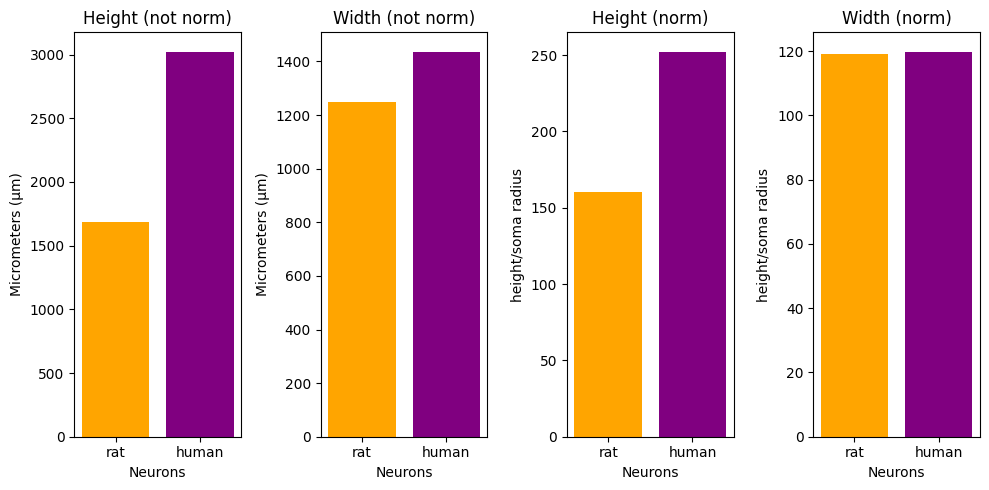

In [15]:
# NOT NORM
# height, normalized to soma radius
Total_h_01_nn = nm.get("total_height", neuron_01)
Total_h_03_nn = nm.get("total_height", neuron_03)

# width, normalized to soma radius
Total_w_01_nn = nm.get("total_width", neuron_01)
Total_w_03_nn = nm.get("total_width", neuron_03)

# NORM
# height, normalized to soma radius
Total_h_01 = nm.get("total_height", neuron_01)/nm.get("soma_radius", neuron_01)
Total_h_03 = nm.get("total_height", neuron_03)/nm.get("soma_radius", neuron_03)

# width, normalized to soma radius
Total_w_01 = nm.get("total_width", neuron_01)/nm.get("soma_radius", neuron_01)
Total_w_03 = nm.get("total_width", neuron_03)/nm.get("soma_radius", neuron_03)

# MAKE PLOT
# Create a figure with 1 row and 4 columns of subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10, 5))

neurons = ['rat', 'human']
colors = ['orange', 'purple']

# NOT NORM
# Total height
total_h_nn = [Total_h_01_nn, Total_h_03_nn]
ax1.bar(neurons, total_h_nn, color=colors)

ax1.set_title("Height (not norm)")
ax1.set_xlabel("Neurons")
ax1.set_ylabel("Micrometers (µm)");

# Total width
total_w_nn = [Total_w_01_nn,Total_w_03_nn]
ax2.bar(neurons, total_w_nn, color=colors)

ax2.set_title("Width (not norm)")
ax2.set_xlabel("Neurons")
ax2.set_ylabel("Micrometers (µm)");

# NORM
# Total height
total_h = [Total_h_01, Total_h_03]
ax3.bar(neurons, total_h, color=colors)

ax3.set_title("Height (norm)")
ax3.set_xlabel("Neurons")
ax3.set_ylabel("height/soma radius");

# Total width
total_w = [Total_w_01,Total_w_03]
ax4.bar(neurons, total_w, color=colors)

ax4.set_title("Width (norm)")
ax4.set_xlabel("Neurons")
ax4.set_ylabel("height/soma radius");

plt.tight_layout()
plt.show()

### Total length of neurites: 

<p style="font-size: 16px;">
Now we will compute the total length of the different neurites: axon, basal dendrites and apical dendrites and we will normalized it using the total length of all the neurites toguether.
</p>


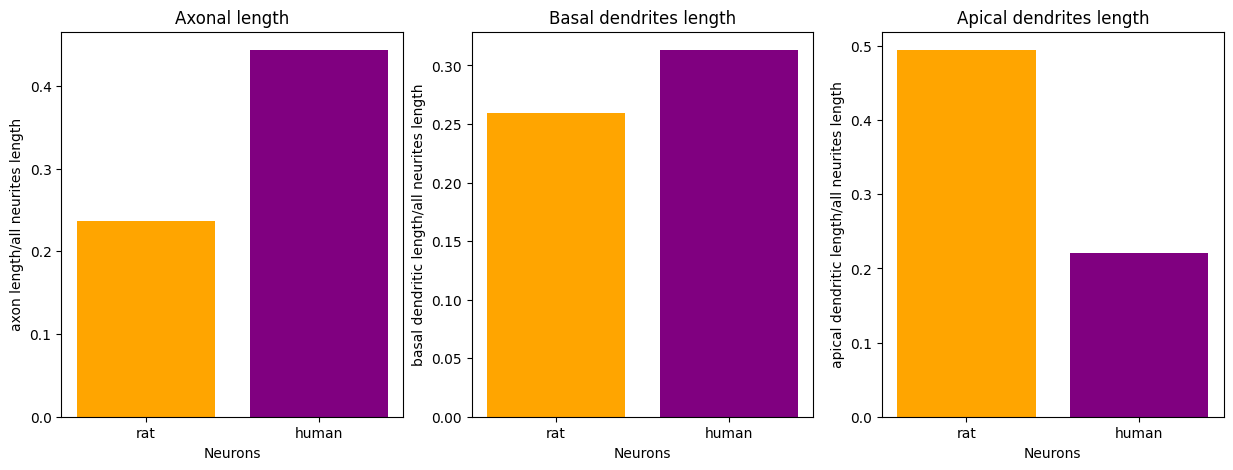

In [16]:
# Axon
axon_length_01 = nm.get("total_length_per_neurite", neuron_01)[0]/nm.get("total_length", neuron_01)
axon_length_03 = nm.get("total_length_per_neurite", neuron_03)[0]/nm.get("total_length", neuron_03)

# Basal dendrites
basal_length_01 = np.sum(nm.get("total_length_per_neurite", neuron_01)[1:5])/nm.get("total_length", neuron_01)
basal_length_03 = np.sum(nm.get("total_length_per_neurite", neuron_03)[1:8])/nm.get("total_length", neuron_03)

# Apical dendrites
apical_length_01 = nm.get("total_length_per_neurite", neuron_01)[6]/nm.get("total_length", neuron_01)
apical_length_03 = nm.get("total_length_per_neurite", neuron_03)[9]/nm.get("total_length", neuron_03)

# MAKE PLOT
# Create a figure with 1 row and 3 columns of subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

neurons = ['rat', 'human']
colors = ['orange', 'purple']

# plot axon length
axon_length = [axon_length_01, axon_length_03]
ax1.bar(neurons, axon_length, color=colors)

ax1.set_title("Axonal length")
ax1.set_xlabel("Neurons")
ax1.set_ylabel("axon length/all neurites length");

# plot basal dendritic length
basal_length = [basal_length_01, basal_length_03]
ax2.bar(neurons, basal_length, color=colors)

ax2.set_title("Basal dendrites length")
ax2.set_xlabel("Neurons")
ax2.set_ylabel("basal dendritic length/all neurites length");

# plot apical dendritic length
apical_length = [apical_length_01, apical_length_03]
ax3.bar(neurons, apical_length, color=colors)

ax3.set_title("Apical dendrites length")
ax3.set_xlabel("Neurons")
ax3.set_ylabel("apical dendritic length/all neurites length");

# 3. Try other analysis by your own to compare the rat and the human neurons.

### If you want to understand what each of the analysis means, I encourage you to read the documentation of the python package [NeuroM](https://neurom.readthedocs.io/en/stable/_neurom_build/neurom.features.morphology.html)

In [17]:
# Get all functions defined in the module
functions_list = [
    name for name, obj in inspect.getmembers(morpho, inspect.isfunction)
]

working_functions = []

for fname in functions_list:
    try:
        nm.get(fname, neuron_01)
        working_functions.append(fname)
    except Exception as e:
        # Skip functions that fail
        pass

dropdown = widgets.Dropdown(
    options=working_functions,  # <- keyword argument!
    description='Select:', # optional, adds a label
)
display(dropdown)

/Users/natalibarroszulaica/Desktop/python/py3_11_venv/lib/python3.11/site-packages/neurom/core/soma.py:351: UserWarning: Approximating soma volume by a sphere. <morphio._morphio.Soma object at 0x115f9a2b0>
  warnings.warn('Approximating soma volume by a sphere. {}'.format(morphio_soma))


Dropdown(description='Select:', options=('aspect_ratio', 'circularity', 'length_fraction_above_soma', 'max_rad…

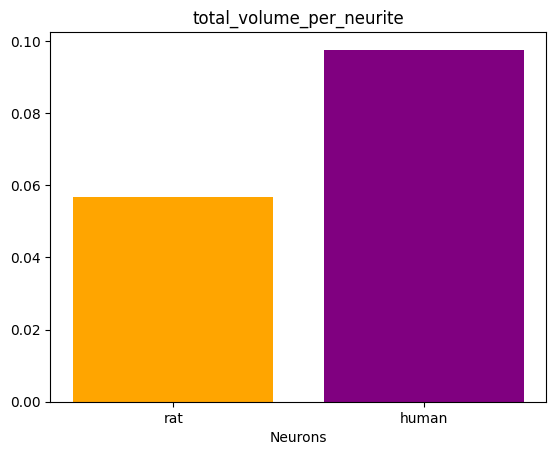

In [19]:
analysis = dropdown.value

if isinstance(nm.get(analysis, neuron_01), list):
    analysis_01 = np.mean(nm.get(analysis, neuron_01))/nm.get("total_length", neuron_01)
    analysis_03 = np.mean(nm.get(analysis, neuron_03))/nm.get("total_length", neuron_01)
else:
    analysis_01 = nm.get(analysis, neuron_01)/nm.get("total_length", neuron_01)
    analysis_03 = nm.get(analysis, neuron_03)/nm.get("total_length", neuron_03)

# MAKE PLOT
neurons = ['rat', 'human']
colors = ['orange', 'purple']
analysis_values = [analysis_01, analysis_03]

plt.figure()
plt.bar(neurons, analysis_values, color=colors)

plt.title(analysis)
plt.xlabel("Neurons")
plt.show()

<font size=6><font color=blue> Questions for the report

<font size=4><font color=blue> Considering what you have seen in the lecture and the results from the plots above:

<font size=4><font color=blue>  1. which neuron is an excitatory pyramidal neuron and which is an inhibitory neuron?

<font size=4><font color=blue>  2. Justify your answer by describing in your own words the differences observed.

<font size=4><font color=red> Incluir paper JDF, podria ser...

<font size=4><font color=red> buscar en la plataforma otra morphologia y generar las graficas para el report.

<font size=4><font color=red> para el report: que diferencias observas entre el humano y la rata. Con los conocimento aprendidos en clase y las siguientes referencias que conclusiones sacarias a nivel funcional.